In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


In [2]:
 from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC 
from sklearn.cluster import KMeans


In [3]:
import pandas as pd
file = Path('crypto_data.csv')

In [4]:
df = pd.read_csv(file)

In [5]:
df.sample(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
829,ISH,Interstellar Holdings,Scrypt,False,PoS,0.0,1970000000
773,WINK,Wink,PoS,True,PoS,NaN,80000000
223,KTK,KryptCoin,Scrypt,True,PoS,0.0,17000000
603,AV,Avatar Coin,PoS,True,PoS,NaN,10000000
1205,VNTY,VENOTY,Scrypt,False,PoW,NaN,94000000


In [6]:
df2 = df.drop('IsTrading', axis=1)
df2.sample(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
805,WOMEN,WomenCoin,Scrypt,PoW/PoS,4.845947e+10,25000000000
779,DFT,Draftcoin,Scrypt,PoS,1.866330e+07,17405891.19707116
1046,TPC,TPCash,Scrypt,PoW/PoS,5.403802e+06,1000000000
266,CYC,ConSpiracy Coin,X11,PoW,0.000000e+00,33000000
726,ILC,ILCoin,SHA-256,PoW,1.317748e+09,2500000000


In [7]:
df2 = df2.dropna()
df2.sample(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
944,CRU,Curium,X11,PoW,0.000000e+00,22000000
838,BCD,Bitcoin Diamond,X13,PoW/PoS,1.835340e+08,210000000
1035,DTEM,Dystem,Quark,PoS,7.082392e+06,21000000
322,EXP,Expanse,Ethash,PoW,1.049528e+07,16906397
273,SOON,SoonCoin,SHA-256,PoW,1.246262e+07,21000000


In [8]:
df2 = df2[df2['TotalCoinsMined'] > 0]
df2.sample(5)

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
1201,J,JoinCoin,Multiple,PoW,3.332922e+06,2800000
248,CYP,CypherPunkCoin,QuBit,PoW,6.365285e+06,0
923,TOKC,Tokyo Coin,X13,PoS,2.302989e+08,800000000
110,HYP,HyperStake,X11,PoS,1.678520e+09,0
254,VTR,Vtorrent,Scrypt,PoW/PoS,1.160472e+07,20000000


In [9]:
df2 = df2.drop(columns=['Unnamed: 0', 'CoinName'], axis=1)

In [10]:
df2

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [20]:
##Your next step in data preparation is to convert the remaining features with 
##text values, Algorithm and ProofType, into numerical data. 
##To accomplish this task, use Pandas to create dummy variables. 
##Examine the number of rows and columns of your dataset now. How did they change?
X_dummies = pd.get_dummies(df2, columns=['Algorithm', 'ProofType'])
X_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)
X_scaled[0]


array([-0.11450078, -0.15072489, -0.04166667, -0.04166667, -0.04166667,
       -0.05897678, -0.0934947 , -0.04166667, -0.05897678, -0.05897678,
       -0.04166667, -0.04166667, -0.18949048, -0.05897678, -0.0934947 ,
       -0.04166667, -0.11081833, -0.0722944 , -0.04166667, -0.04166667,
       -0.1518211 , -0.04166667, -0.13280318, -0.04166667, -0.04166667,
       -0.0835512 , -0.05897678, -0.04166667, -0.04166667, -0.04166667,
       -0.05897678, -0.04166667, -0.0835512 , -0.0934947 , -0.10250796,
       -0.04166667, -0.1258772 , -0.13280318, -0.1518211 , -0.04166667,
       -0.0835512 , -0.04166667, -0.04166667, -0.0722944 , -0.17423301,
       -0.04166667, -0.04166667, -0.04166667, -0.0722944 , -0.16888013,
       -0.30802055, -0.04166667, -0.0934947 , -0.0934947 , -0.05897678,
        1.39963365, -0.04166667, -0.04166667, -0.04166667, -0.0835512 ,
       -0.04166667, -0.04166667, -0.04166667, -0.04166667, -0.04166667,
       -0.05897678, -0.04166667, -0.04166667, -0.39536391, -0.04

In [51]:
## PCA
steps = [
    ('pca', PCA(n_components=0.90))
]

In [52]:
pca1 = PCA(n_components=0.90)
pca_transformdata = pca1.fit_transform(X_scaled)
preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?len(pca_transformdata[0])

77

## When 90% of variance is preserved, we see dimensionality reduction change to 77 features.

In [53]:
## TSNE

tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_transformdata)

C:\Users\jogaw\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [54]:
tsne_features.shape 

(577, 2)

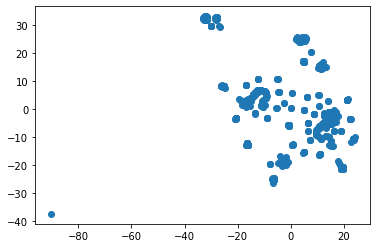

In [55]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## When running the TSNE model we see some clusters with some outliers, however the clusters don't seem very strong and distinct

In [49]:
## k-Means
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\jogaw\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,58277.000000
1,2,57120.212099
2,3,56316.676916
3,4,54587.531180
4,5,53921.720572


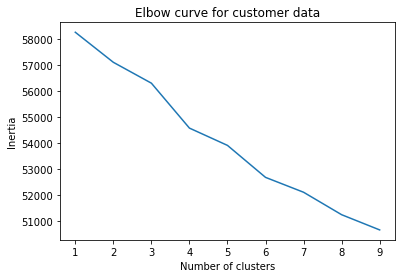

In [50]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## When running K-Means on the X_Scaled data, we don't see any strong distinct clusters on the elbow curve

C:\Users\jogaw\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


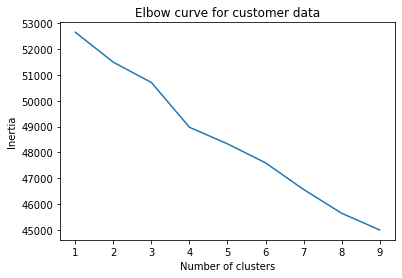

In [56]:
## k-Means
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformdata)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

## The X_scaled data does not show any distinct cluster and neither does the PCA data with 90% variance. There are 0 clusters.